In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

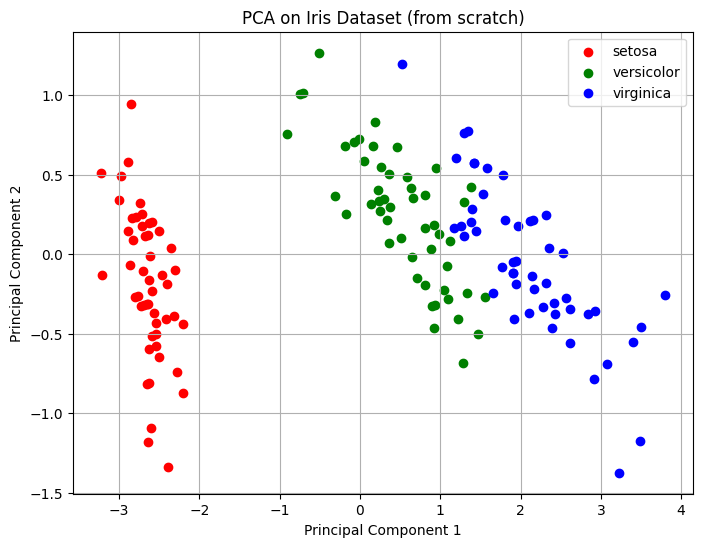

In [4]:
# 1. Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# 2. Standardize the data (zero mean, unit variance)
X_mean = np.mean(X, axis=0)
X_std = X - X_mean  # mean centering

# 3. Compute covariance matrix
cov_matrix = np.cov(X_std, rowvar=False)

# 4. Find eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# 5. Sort eigenvalues (descending) and select top 2 eigenvectors
sorted_idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_idx]
eigenvectors = eigenvectors[:, sorted_idx]

# Pick top 2 components
eigenvectors_2d = eigenvectors[:, :2]

# 6. Transform data to 2D
X_pca = X_std.dot(eigenvectors_2d)

# 7. Visualize
colors = ['red', 'green', 'blue']
plt.figure(figsize=(8,6))

for i, color, label in zip([0,1,2], colors, target_names):
    plt.scatter(X_pca[y==i, 0], X_pca[y==i, 1], color=color, label=label)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA on Iris Dataset (from scratch)")
plt.legend()
plt.grid(True)
plt.show()
